In [89]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import collections
import scipy
from scipy import stats
from statannot import add_stat_annotation
from scipy.stats import mannwhitneyu
import matplotlib as mpl

In [90]:
cp_ip={'constitutive proteosome': '#bf812d','Immuno proteosome':'#35978f'}

In [91]:
commonFontsize=8
def config_rcparams():
    plt.rcParams['font.family'] = ['sans-serif']
    plt.rcParams['font.sans-serif'] = ['arial']
    plt.rcParams['font.size'] = commonFontsize
    plt.rcParams['axes.labelsize'] = commonFontsize
    plt.rcParams['xtick.labelsize'] = commonFontsize
    plt.rcParams['ytick.labelsize'] = commonFontsize
    plt.rcParams['axes.titlesize'] = commonFontsize
    plt.rcParams['svg.fonttype'] = 'none'
    plt.rcParams['mathtext.fontset'] = 'custom'
    plt.rcParams['mathtext.cal'] = 'arial'
    plt.rcParams['mathtext.rm'] = 'arial'
    plt.rcParams['axes.edgecolor'] = 'black'
    plt.rcParams['ytick.color'] = 'black'
    plt.rcParams['axes.linewidth'] = 0.7
    plt.rcParams['xtick.major.width'] = 0.7
    plt.rcParams['ytick.major.width'] = 0.7
    plt.rcParams['xtick.major.size' ] = 3
    plt.rcParams['ytick.major.size' ] = 3
    plt.rcParams['text.usetex' ] = False
config_rcparams()

In [92]:
import glob, os
os.chdir("/workspace/projects/immunoproteasome/data/tcga_tumor/")
list_of_tumor_filename=[]
for  i in glob.glob("*.tsv"):
    list_of_tumor_filename.append(i)
os.chdir("/workspace/incubator/rahul_project/")

In [152]:
gene_data_frame=pd.read_csv("/workspace/shared/dataset/tcga_exome/expression/data_parsed_dataframe/ACC.tsv",sep='\t')   

In [136]:
np.log2(gene_data_frame[gene_data_frame['GENE']=='A1BG']['RSEM'][0]+0.01)

-6.643856189774724

In [165]:
gene_data_frame[gene_data_frame['GENE']=='PSMB8']

,GENE,SAMPLE,RSEM,log2(RSEM)
1124170,PSMB8,TCGA-OR-A5J1-01A-11R-A29S-07,648.8953,9.341864
1124171,PSMB8,TCGA-OR-A5J2-01A-11R-A29S-07,281.0360,8.134662
1124172,PSMB8,TCGA-OR-A5J3-01A-11R-A29S-07,1105.0215,10.109872
1124173,PSMB8,TCGA-OR-A5J5-01A-11R-A29S-07,986.0573,9.945542
1124174,PSMB8,TCGA-OR-A5J6-01A-31R-A29S-07,2814.4023,11.458618
...,...,...,...,...
1124243,PSMB8,TCGA-PA-A5YG-01A-11R-A29S-07,1553.3981,10.601221
1124244,PSMB8,TCGA-PK-A5H8-01A-11R-A29S-07,1971.8926,10.945373
1124245,PSMB8,TCGA-PK-A5H9-01A-11R-A29S-07,2401.4656,11.229705
1124246,PSMB8,TCGA-PK-A5HA-01A-11R-A29S-07,1657.1114,10.694464


In [166]:
gene_data_frame=pd.read_csv("/workspace/shared/dataset/tcga_exome/expression/data_parsed/ACC.tsv",sep='\t')   

In [192]:
gene_data_frame#[gene_data_frame['Hybridization REF']=='PSMB8']

,TCGA-OR-A5J1-01A-11R-A29S-07,TCGA-OR-A5J2-01A-11R-A29S-07,TCGA-OR-A5J3-01A-11R-A29S-07,TCGA-OR-A5J5-01A-11R-A29S-07,TCGA-OR-A5J6-01A-31R-A29S-07,TCGA-OR-A5J7-01A-11R-A29S-07,TCGA-OR-A5J8-01A-11R-A29S-07,TCGA-OR-A5J9-01A-11R-A29S-07,TCGA-OR-A5JA-01A-11R-A29S-07,TCGA-OR-A5JB-01A-11R-A29S-07,...,TCGA-OR-A5LS-01A-11R-A29S-07,TCGA-OR-A5LT-01A-11R-A29S-07,TCGA-OU-A5PI-01A-12R-A29S-07,TCGA-P6-A5OF-01A-11R-A29S-07,TCGA-P6-A5OG-01A-22R-A29S-07,TCGA-PA-A5YG-01A-11R-A29S-07,TCGA-PK-A5H8-01A-11R-A29S-07,TCGA-PK-A5H9-01A-11R-A29S-07,TCGA-PK-A5HA-01A-11R-A29S-07,TCGA-PK-A5HB-01A-11R-A29S-07
Hybridization REF,,,,,,,,,,,,,,,,,,,,,
gene_id,normalized_count,normalized_count,normalized_count,normalized_count,normalized_count,normalized_count,normalized_count,normalized_count,normalized_count,normalized_count,...,normalized_count,normalized_count,normalized_count,normalized_count,normalized_count,normalized_count,normalized_count,normalized_count,normalized_count,normalized_count
?|100130426,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,2.0329,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3489,0.0000,0.0000
?|100133144,3.2661,2.6815,1.7301,0.0000,0.0000,1.1673,1.4422,0.0000,4.4556,7.1293,...,0.0000,2.2279,1.3341,6.5037,5.4356,5.4184,12.9294,12.3004,0.0000,10.8781
?|100134869,3.9385,8.9948,6.5650,1.5492,4.4709,6.0529,2.2876,1.3599,5.0581,0.0000,...,1.3552,2.0238,4.3672,7.5753,10.6025,5.6773,7.0581,17.3602,3.3076,4.3585
?|10357,149.1354,81.0777,86.4879,53.9117,66.9063,103.5058,94.9316,78.1955,69.2389,155.7090,...,37.8384,59.1837,114.1676,109.2452,107.5683,90.4392,97.5203,67.3960,62.9879,92.5662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYX|7791,1841.02,3059.99,2655.61,2367.93,708.071,855.194,10924.6,2122.16,1939.22,4050.35,...,1761.82,1636.05,2773.09,2311.69,5692.24,2948.22,853.841,1422.66,2910.69,2812.35
ZZEF1|23140,1157.54,1895.99,1482.45,1140.2,796.371,897.714,1095.73,1003.62,904.863,370.28,...,1065.22,1148.81,1316.99,1323.82,1006.94,741.563,971.268,1604.12,658.214,731.756
ZZZ3|26009,596.062,801.637,437.269,512.781,475.587,397.112,462.08,642.223,542.812,995.433,...,496.019,323.129,547.89,459.914,958.821,514.101,637.726,786.531,326.351,615.878


In [173]:
gene_data_frame=pd.read_csv("/workspace/shared/dataset/tcga_exome/expression/data/ACC.tsv",index_col='Hybridization REF',sep='\t')   

/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [191]:
gene_data_frame.T['PSMB8|5696']

TCGA-OR-A5J1-01A-11R-A29S-07    648.895
TCGA-OR-A5J2-01A-11R-A29S-07    281.036
TCGA-OR-A5J3-01A-11R-A29S-07    1105.02
TCGA-OR-A5J5-01A-11R-A29S-07    986.057
TCGA-OR-A5J6-01A-31R-A29S-07     2814.4
                                 ...   
TCGA-PA-A5YG-01A-11R-A29S-07     1553.4
TCGA-PK-A5H8-01A-11R-A29S-07    1971.89
TCGA-PK-A5H9-01A-11R-A29S-07    2401.47
TCGA-PK-A5HA-01A-11R-A29S-07    1657.11
TCGA-PK-A5HB-01A-11R-A29S-07    401.764
Name: PSMB8|5696, Length: 79, dtype: object

In [188]:
gene_data_frame[gene_data_frame.loc['PSMB8|5696']]

KeyError: "None of [Float64Index([ 648.8953,   281.036, 1105.0215,  986.0573, 2814.4023, 1663.8588,\n               1904.683,  389.6173, 2214.5877, 3682.2992, 1773.5369,  922.3301,\n              2572.3982,   760.305,  399.3014,  1172.988, 1432.8425, 3620.1373,\n              4232.5581,  567.2414,  2707.675,  479.1392,   942.769, 1453.0516,\n              1229.3748, 2461.6842, 1522.8453,  879.7718, 1061.7804, 2096.7309,\n              2872.8799, 1691.8605, 3492.9146, 1128.0501, 2230.2717, 1990.0721,\n               838.7689, 2032.3069, 1094.3396,  804.3096,   952.671, 2160.8863,\n               939.6375,  243.3475,  779.8029, 1520.5545,  193.0271, 1546.0606,\n              2083.7054, 1254.8324, 2848.7165,  3364.486,  227.0551, 4064.5161,\n              2594.4987,  864.9027, 1143.1479,  419.2673,  687.6107, 1031.5095,\n              3309.2947,  794.3619, 1450.8475,  863.7655, 4976.1369, 1879.7688,\n               625.1802, 1116.8826, 2340.5858,  637.6419,  719.3878,  625.9977,\n               543.6058, 2820.5462, 1553.3981, 1971.8926, 2401.4656, 1657.1114,\n               401.7642],\n             dtype='float64')] are in the [columns]"

In [183]:
list(gene_data_frame.index)[14000:20000]

['PRB1|5542',
 'PRB2|653247',
 'PRB3|5544',
 'PRB4|5545',
 'PRC1|9055',
 'PRCC|5546',
 'PRCD|768206',
 'PRCP|5547',
 'PRDM10|56980',
 'PRDM11|56981',
 'PRDM12|59335',
 'PRDM13|59336',
 'PRDM14|63978',
 'PRDM15|63977',
 'PRDM16|63976',
 'PRDM1|639',
 'PRDM2|7799',
 'PRDM4|11108',
 'PRDM5|11107',
 'PRDM6|93166',
 'PRDM7|11105',
 'PRDM8|56978',
 'PRDM9|56979',
 'PRDX1|5052',
 'PRDX2|7001',
 'PRDX3|10935',
 'PRDX4|10549',
 'PRDX5|25824',
 'PRDX6|9588',
 'PRDXDD1P|344405',
 'PREB|10113',
 'PRELID1|27166',
 'PRELID2|153768',
 'PRELP|5549',
 'PREPL|9581',
 'PREP|5550',
 'PREX1|57580',
 'PREX2|80243',
 'PRF1|5551',
 'PRG1|23574',
 'PRG2|5553',
 'PRG3|10394',
 'PRG4|10216',
 'PRH1|5554',
 'PRH2|5555',
 'PRHOXNB|646625',
 'PRIC285|85441',
 'PRICKLE1|144165',
 'PRICKLE2|166336',
 'PRICKLE3|4007',
 'PRICKLE4|29964',
 'PRIM1|5557',
 'PRIM2|5558',
 'PRIMA1|145270',
 'PRINS|100169750',
 'PRKAA1|5562',
 'PRKAA2|5563',
 'PRKAB1|5564',
 'PRKAB2|5565',
 'PRKACA|5566',
 'PRKACB|5567',
 'PRKACG|5568',
 'PR

In [120]:
gene_data_frame#.loc['A1BG|1']

,TCGA-OR-A5J1-01A-11R-A29S-07,TCGA-OR-A5J2-01A-11R-A29S-07,TCGA-OR-A5J3-01A-11R-A29S-07,TCGA-OR-A5J5-01A-11R-A29S-07,TCGA-OR-A5J6-01A-31R-A29S-07,TCGA-OR-A5J7-01A-11R-A29S-07,TCGA-OR-A5J8-01A-11R-A29S-07,TCGA-OR-A5J9-01A-11R-A29S-07,TCGA-OR-A5JA-01A-11R-A29S-07,TCGA-OR-A5JB-01A-11R-A29S-07,...,TCGA-OR-A5LR-01A-11R-A29S-07,TCGA-OR-A5LS-01A-11R-A29S-07,TCGA-OR-A5LT-01A-11R-A29S-07,TCGA-OU-A5PI-01A-12R-A29S-07,TCGA-P6-A5OF-01A-11R-A29S-07,TCGA-PA-A5YG-01A-11R-A29S-07,TCGA-PK-A5H8-01A-11R-A29S-07,TCGA-PK-A5H9-01A-11R-A29S-07,TCGA-PK-A5HA-01A-11R-A29S-07,TCGA-PK-A5HB-01A-11R-A29S-07
Hybridization REF,,,,,,,,,,,,,,,,,,,,,
A1BG,16.3305,9.5987,20.7377,1696.6615,600.1618,10.8303,50.5595,8.1119,52.3256,191.4092,...,164.8536,23.3576,32.3129,19.3843,46.3277,42.4873,1622.0737,92.9355,710.1158,152.3777
A1CF,0.0000,0.0000,0.5925,1.5492,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,11.8643,0.0000,1.2029
A2BP1,17.2911,5.6368,8.8876,6.1967,4.4709,3.2090,0.0000,33.3181,6.8710,0.0000,...,3.3473,154.4977,2.5510,18.2440,89.5581,0.0000,4.3723,0.0000,36.9350,6.4154
A2LD1,182.3919,239.1584,138.8831,63.9349,237.3520,89.3903,53.1828,274.2960,268.3774,46.5991,...,77.2887,79.0581,101.5306,53.3238,319.5894,60.2959,120.6371,445.9391,118.3407,101.2510
A2ML1,54.7550,0.0000,1.7775,49.5740,1.1177,2.8079,4.5586,29.2383,33.2981,0.0000,...,28.4519,59.6307,22.9592,90.0798,28.5491,132.2238,13.1168,9.4216,0.0000,0.4010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYX,1841.0183,3059.9909,2655.6066,2367.9318,708.0714,855.1945,10924.5752,2122.1566,1939.2178,4050.3509,...,1201.6736,1761.8160,1636.0544,2773.0901,2311.6934,2948.2201,853.8413,1422.6642,2910.6946,2812.3496
ZZEF1,1157.5408,1895.9865,1482.4470,1140.2014,796.3708,897.7136,1095.7315,1003.6216,904.8626,370.2796,...,821.7573,1065.2211,1148.8095,1316.9897,1323.8170,741.5626,971.2680,1604.1176,658.2139,731.7562
ZZZ3,596.0615,801.6371,437.2686,512.7808,475.5870,397.1119,462.0804,642.2227,542.8118,995.4328,...,580.7531,496.0190,323.1293,547.8905,459.9140,514.1008,637.7264,786.5306,326.3506,615.8781


In [143]:
gene_data_frame=pd.read_csv("/workspace/shared/dataset/tcga_exome/expression/data/ACC.tsv",index_col='Hybridization REF',sep='\t')   

/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [148]:
gene_data_frame.loc['A1BG|1']

TCGA-OR-A5J1-01A-11R-A29S-07      16.3305
TCGA-OR-A5J2-01A-11R-A29S-07       9.5987
TCGA-OR-A5J3-01A-11R-A29S-07      20.7377
TCGA-OR-A5J5-01A-11R-A29S-07    1696.6615
TCGA-OR-A5J6-01A-31R-A29S-07     600.1618
                                  ...    
TCGA-PA-A5YG-01A-11R-A29S-07      42.4873
TCGA-PK-A5H8-01A-11R-A29S-07    1622.0737
TCGA-PK-A5H9-01A-11R-A29S-07      92.9355
TCGA-PK-A5HA-01A-11R-A29S-07     710.1158
TCGA-PK-A5HB-01A-11R-A29S-07     152.3777
Name: A1BG|1, Length: 79, dtype: object

In [98]:
list_of_tumor_filename

['ACC.tsv',
 'LIHC.tsv',
 'PCPG.tsv',
 'MESO.tsv',
 'STAD.tsv',
 'ESCA.tsv',
 'KICH.tsv',
 'UCS.tsv',
 'HNSC.tsv',
 'OV.tsv',
 'COAD.tsv',
 'CESC.tsv',
 'PAAD.tsv',
 'UVM.tsv',
 'SARC.tsv',
 'LUSC.tsv',
 'BLCA.tsv',
 'LGG.tsv',
 'CHOL.tsv',
 'LAML.tsv',
 'GBM.tsv',
 'SKCM.tsv',
 'PRAD.tsv',
 'UCEC.tsv',
 'TGCT.tsv',
 'KIRP.tsv',
 'THYM.tsv',
 'THCA.tsv',
 'BRCA.tsv',
 'KIRC.tsv',
 'DLBC.tsv',
 'LUAD.tsv',
 'READ.tsv']

### 1. Analysis of constituive and immunoproteasomes in all samples

In [102]:
config_rcparams()
input_path1="/workspace/projects/immunoproteasome/data/tcga_tumor/"
median_avg_log_proteosome_genes=[]
median_const_score=[]
newdf=pd.DataFrame(columns=['constitutive_proteosome','immuno_proteosome','tumor_type'])
list_of_tumor_filename1=[]
frames={}

tumor_list=[]
corr_p_value_tumor_type_df=pd.DataFrame()
corr_list=[]
p_value_list=[]
frames1={}

for i in range(1):#len(list_of_tumor_filename)):
    gene_data_frame=pd.read_csv(input_path1+list_of_tumor_filename[i],index_col='Hybridization REF',sep='\t')
    gene_data_frame.columns=gene_data_frame.columns.str.split('-').str[0:3].str.join('.')
    #gene_data_frame=(gene_data_frame+1).T
    log_gene_data_frame=gene_data_frame.T
    #log_gene_data_frame=np.log2(gene_data_frame[['PSMB5','PSMB6','PSMB7','PSMB8','PSMB9','PSMB10']])
    
    log_gene_data_frame1=log_gene_data_frame
    log_gene_data_frame1['Tumor tissue']=list_of_tumor_filename[i].split('.')[0]
    frames1[i]=log_gene_data_frame1
    
    log_gene_data_frame['constitutive_proteosome']=(1/3)*(log_gene_data_frame['PSMB5']+log_gene_data_frame['PSMB6']+log_gene_data_frame['PSMB7'])
    log_gene_data_frame['immuno_proteosome']=(1/3)*(log_gene_data_frame['PSMB8']+log_gene_data_frame['PSMB9']+log_gene_data_frame['PSMB10'])
            
    ### computing correlation value ################################
    correlation, p_value = stats.spearmanr(log_gene_data_frame['constitutive_proteosome'], log_gene_data_frame['immuno_proteosome'])
    
    corr_list.append(correlation)  
    tumor_list.append(list_of_tumor_filename[i].split('.')[0])
    p_value_list.append(p_value)
    #####===============================================================
    
    extracted_df=log_gene_data_frame[['constitutive_proteosome','immuno_proteosome']]
    
    frames[i]=log_gene_data_frame[['constitutive_proteosome','immuno_proteosome']]
    frames[i]['Tumor type']=list_of_tumor_filename[i].split('.')[0]+"("+str(extracted_df.shape[0])+")"
    median_const_score.append(np.median(frames[i]['constitutive_proteosome']))
    
### correlation value dataframe
corr_p_value_tumor_type_df['tumor_type']=tumor_list
corr_p_value_tumor_type_df['IP vs CP corr']=corr_list    
corr_p_value_tumor_type_df['p_value']=p_value_list
##=======================================================
    
concat_df=pd.concat(frames)
### for ordering the boxplot ==============================================
median_const_df=pd.DataFrame()
median_const_df['Tumor type']=list(concat_df['Tumor type'].unique())
median_const_df['median_const_score']=median_const_score
my_order=median_const_df.sort_values(by=['median_const_score'])['Tumor type']
my_order1=median_const_df.sort_values(by=['median_const_score'])['Tumor type']
###==========================================================================

const_df=concat_df[['constitutive_proteosome','Tumor type']]
immuno_df=concat_df[['immuno_proteosome','Tumor type']]
const_df['Proteosome type']='constitutive proteosome'
const_df=const_df.rename(columns={'constitutive_proteosome':'Average expression score'})
immuno_df['Proteosome type']='Immuno proteosome'
immuno_df=immuno_df.rename(columns={'immuno_proteosome':'Average expression score'})
const_immuno_df_tcga=pd.concat([const_df,immuno_df])

#### Creating files for supplementary #####################################
CP_IP_TCGA=pd.concat(frames1)
CP_IP_TCGA1= CP_IP_TCGA.reset_index(level=[0])
CP_IP_TCGA1=CP_IP_TCGA1.drop(['level_0'],axis=1)
CP_IP_TCGA1=CP_IP_TCGA1.reindex(columns=['PSMB5','PSMB6','PSMB7','PSMB8','PSMB9','PSMB10','constitutive_proteosome','immuno_proteosome','Tumor tissue'])
####-----------------------------------------------------------------

/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [97]:
gene_data_frame.T[['PSMB8','PSMB9','PSMB10']]

Hybridization REF,PSMB8,PSMB9,PSMB10
TCGA.AF.2687,4311.1963,2097.9140,1268.6249
TCGA.AF.2689,2238.1800,621.5628,1980.2176
TCGA.AF.2690,2387.5969,1351.8454,1597.1306
TCGA.AF.2693,4586.3897,1692.0913,2268.5275
TCGA.AF.3911,4924.6187,1961.2311,2111.0243
...,...,...,...
TCGA.F5.6814,3791.5483,935.3693,2128.5511
TCGA.F5.6861,3320.3047,1080.8215,2039.0858
TCGA.F5.6863,2016.3569,366.9145,1777.6952
TCGA.F5.6864,2737.3202,1010.2195,2161.9985


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

ACC(78)_constitutive proteosome v.s. ACC(78)_Immuno proteosome: Mann-Whitney-Wilcoxon test two-sided, P_val=2.827e-21 U_stat=5.714e+03
LIHC(368)_constitutive proteosome v.s. LIHC(368)_Immuno proteosome: Mann-Whitney-Wilcoxon test two-sided, P_val=1.068e-46 U_stat=1.091e+05
PCPG(178)_constitutive proteosome v.s. PCPG(178)_Immuno proteosome: Mann-Whitney-Wilcoxon test two-sided, P_val=2.060e-50 U_stat=3.034e+04
MESO(87)_constitutive proteosome v.s. MESO(87)_Immuno proteosome: Mann-Whitney-Wilcoxon test two-sided, P_val=2.286e-01 U_stat=4.185e+03
UCS(57)_constitutive proteosome v.s. UCS(57)_Immuno proteosome: Mann-Whitney-Wilcoxon test two-sided, P_val=9.023e-18 U_stat=3.140e+03
HNSC(515)_constitutive proteosome v.s. HNSC(515)_Immuno proteosome: Mann-Whitney-Wilcoxon test two-sided, P_val=1.024e-53 U_stat=2.063e+05
OV(300)_cons

/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app


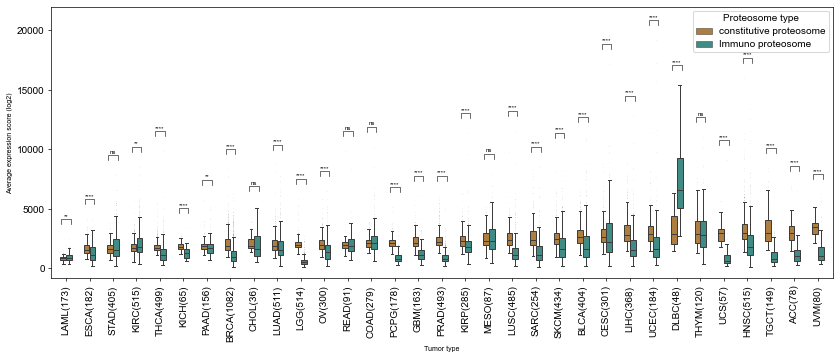

In [30]:
### plotting the constitutve and immunoproteasome in 33 tumor types 
aa=list(const_immuno_df_tcga['Tumor type'].unique())
bb=list(const_immuno_df_tcga['Proteosome type'].unique())
box_pairs=[]
for i in range(33):
    box_pairs.append(((aa[i],bb[0]),(aa[i],bb[1])))

#plt.figure(figsize=(9.5,3.5))
plt.figure(figsize=(14,5))
#res=sns.boxplot(x="Tumor type",y="Average expression score",hue="Proteosome type",data=const_immuno_df_tcga,order=my_order,width=.5,linewidth=1,palette={'constitutive proteosome': '#bf812d','Immuno proteosome':'#35978f'},fliersize=.5)
res=sns.boxplot(x="Tumor type",y="Average expression score",hue="Proteosome type",data=const_immuno_df_tcga,order=my_order,width=.5,linewidth=1,palette={'constitutive proteosome': '#bf812d','Immuno proteosome':'#35978f'},fliersize=.02)
add_stat_annotation(res, data=const_immuno_df_tcga, x="Tumor type", y="Average expression score",hue="Proteosome type",order=my_order,box_pairs=box_pairs,test='Mann-Whitney',comparisons_correction=None,text_format='star', loc='inside', verbose=2,linewidth=0.7,fontsize = 6)
plt.xticks(rotation=90)
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 10)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 10)
plt.setp(res.get_legend().get_texts(), fontsize='10')
plt.setp(res.get_legend().get_title(), fontsize='10')
plt.xlabel("Tumor type",fontsize=7)
plt.ylabel("Average expression score (log2)",fontsize=7)
#plt.savefig("/workspace/projects/immunoproteasome/plots/"+'Constitutive_immuno_proteosome_level_v1'+'.svg',bbox_inches = "tight")
plt.show()

order_all_tumor_samples=[]
for i in range(len(my_order)):
    order_all_tumor_samples.append(list(my_order)[i].split('(')[0])

### 2.CP IP correlation plot in TCGA samples

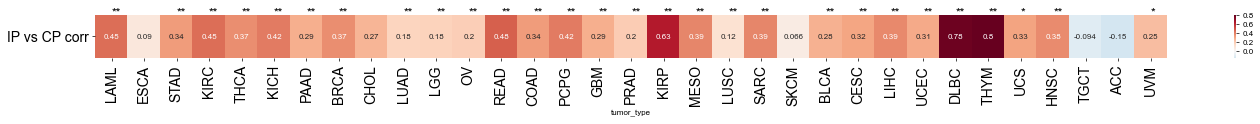

In [31]:
### Plotting correaltion heatmap  ####################################
tumor_list=order_all_tumor_samples
corr_p_value_tumor_type_df.sort_values(by=['IP vs CP corr'],inplace=True)
corr_p_value_tumor_type_df.index=list(range(0,33))
conditions=[(corr_p_value_tumor_type_df['p_value'] < 0.01),(corr_p_value_tumor_type_df['p_value'] > 0.01) & (corr_p_value_tumor_type_df['p_value'] < 0.05),(corr_p_value_tumor_type_df['p_value'] > 0.05)]
values=['**','*','']
corr_p_value_tumor_type_df['significance'] = np.select(conditions, values)
corr_p_value_tumor_type_df.to_csv('/workspace/projects/immunoproteasome/'+'TCGA_cp_ip_corr'+'.csv')

#median_const_immuno_tumor_type_df
corr_p_value_tumor_type_df
corr_p_value_tumor_type_df=corr_p_value_tumor_type_df.set_index('tumor_type').reindex(tumor_list).reset_index()
df_tmp=corr_p_value_tumor_type_df
df_tmp.index=list(range(0,33))

df_tmp1=df_tmp[['tumor_type','IP vs CP corr','p_value','significance']].set_index('tumor_type')
df_tmp1=df_tmp1.reindex(tumor_list)
fig=plt.figure(figsize=(24,0.8))
df_tmp2=df_tmp1[['IP vs CP corr','significance']]
res=sns.heatmap(df_tmp2[['IP vs CP corr']].T,annot=True,xticklabels=True, yticklabels=True,cmap="RdBu_r",center=0)
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 14)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
for i in range(33):
    res.annotate(df_tmp2['significance'][i],xy=(i+0.5,0),fontsize = 12)
#plt.savefig("/workspace/projects/immunoproteasome/plots/"+'Corr_value_constitutive_and_immuno_v1'+'.svg',bbox_inches = "tight",dpi=500)
plt.show()


In [33]:
df_corr_IP_CP_TCGA=df_tmp1

In [27]:
df_corr_log_IP_CP_TCGA=df_tmp1

In [37]:
new_corr_df=pd.merge(df_corr_IP_CP_TCGA,df_corr_log_IP_CP_TCGA,left_index=True, right_index=True)

In [41]:
new_corr_df=new_corr_df.rename(columns={'IP vs CP corr_x':'IP vs CP corr_RSEM','IP vs CP corr_y':'IP vs CP corr_log_RSEM+1'})

In [44]:
#df.to_csv('file1.csv')
new_corr_df.to_csv('/workspace/projects/immunoproteasome/supplementary_tables/corr_TCGA.csv')

In [45]:
new_corr_df

,IP vs CP corr_RSEM,p_value_x,significance_x,IP vs CP corr_log_RSEM+1,p_value_y,significance_y
tumor_type,,,,,,
LAML,0.448396,6.147143e-10,**,0.458050,2.349486e-10,**
ESCA,0.089585,2.291068e-01,,0.069397,3.519131e-01,
STAD,0.341752,1.545160e-12,**,0.344040,1.073040e-12,**
KIRC,0.450007,4.821961e-27,**,0.421908,1.206189e-23,**
THCA,0.374780,4.362621e-18,**,0.348842,1.002939e-15,**
KICH,0.416171,5.647228e-04,**,0.383741,1.601982e-03,**
PAAD,0.291824,2.187156e-04,**,0.277280,4.577286e-04,**
BRCA,0.373353,4.030571e-37,**,0.385260,1.310302e-39,**
CHOL,0.273102,1.070522e-01,,0.291892,8.409832e-02,


In [46]:
df_corr_log_IP_CP_TCGA

,IP vs CP corr,p_value,significance
tumor_type,,,
LAML,0.458050,2.349486e-10,**
ESCA,0.069397,3.519131e-01,
STAD,0.344040,1.073040e-12,**
KIRC,0.421908,1.206189e-23,**
THCA,0.348842,1.002939e-15,**
KICH,0.383741,1.601982e-03,**
PAAD,0.277280,4.577286e-04,**
BRCA,0.385260,1.310302e-39,**
CHOL,0.291892,8.409832e-02,


In [47]:
### Computing interquertile values for constitutive and immunoproteaosme
const_immuno_df_tcga[const_immuno_df_tcga['Proteosome type']=='constitutive proteosome']
q3,q1=np.percentile(const_immuno_df_tcga[const_immuno_df_tcga['Proteosome type']=='Immuno proteosome']['Average expression score'],[75,25])
iqr=q3-q1
print('immuo_proteasome_iqr',iqr)
q3,q1=np.percentile(const_immuno_df_tcga[const_immuno_df_tcga['Proteosome type']=='constitutive proteosome']['Average expression score'],[75,25])
iqr=q3-q1
print('constitutive_proteasome_iqr',iqr)

immuo_proteasome_iqr 1285.069433333333
constitutive_proteasome_iqr 1034.8166166666665


### 2. Analysis of Constitutive and Immuno proteasomes in GTEx normal samples

In [69]:
Gtex_gene_exp_df-1

sample,PSMB9,PSMB8,PSMB7,PSMB6,PSMB5,PSMB10,A1CF,A1BG,A2M,constitutive_proteosome,immuno_proteosome
GTEX-S4Q7-0003,6238.436387,5464.735762,3186.920640,1560.698241,1878.196219,3935.233256,4.980641,402.576959,211.688763,2208.605033,5212.801802
GTEX-QV31-1626,199.616993,532.113904,2000.547308,2082.653977,1820.990852,324.587161,2.218080,104.485435,64623.787003,1968.064045,352.106019
GTEX-13OW5-0626,448.039952,1387.007839,1720.797783,1649.399987,2005.548066,733.745089,0.927592,118.386839,24009.869033,1791.915279,856.264293
GTEX-P4PQ-0126,320.750817,1408.824630,2814.547939,1515.678936,1553.462394,444.413045,0.000000,126.982257,17417.104345,1961.229757,724.662831
GTEX-S33H-1226,301.061813,942.513925,2712.238210,1487.042483,2125.846207,1726.535928,719.922317,116.555644,9117.621327,2108.375633,990.037222
...,...,...,...,...,...,...,...,...,...,...,...
GTEX-11ZTS-3326,210.952915,843.819895,1576.473441,1621.609360,2316.574499,679.853219,8.051770,627.774979,23087.710809,1838.219100,578.208677
GTEX-VJYA-0726,410.628767,1400.542716,3113.748581,2726.001919,2434.327362,644.959543,0.000000,30.960100,9438.534493,2758.025954,818.710342
GTEX-ZA64-2126,367.315934,819.636777,2537.217529,1359.762902,1818.971319,388.316586,2.515915,217.789547,25644.178632,1905.317250,525.089766
GTEX-Q2AG-2826,47.691566,105.809784,1839.012689,1096.876455,1329.359095,280.092276,0.000000,231.647198,1938.944952,1421.749413,144.531209


In [70]:
with open('/workspace/projects/immunoproteasome/data/gtex_normal/gtex_RSEM_Hugo_norm_count','r') as f:
    listl=[]
    gene_list=[]
    diff_list=[]
    i=0
    for line in f:
        strip_lines=line.strip()
        listli=strip_lines.split()
        m=listl.append(listli)
        gene_list.append(listl[i][0])
        if gene_list[i] in ['PSMB5','PSMB6','PSMB7','PSMB8','PSMB9','PSMB10','A1BG','A2M','A1CF']:
            diff_list.append(listl[i])
        i=i+1

Gtex_gene_exp_df = pd.DataFrame.from_records(diff_list)
Gtex_gene_exp_df.columns=listl[0]
Gtex_gene_exp_df=Gtex_gene_exp_df.set_index('sample')
Gtex_gene_exp_df=Gtex_gene_exp_df.T
Gtex_gene_exp_df=Gtex_gene_exp_df.astype(float)   ## change the data type
Gtex_gene_exp_df=(2**Gtex_gene_exp_df)-1  ## to convert it back to the RSEM value
Gtex_gene_exp_df['constitutive_proteosome']=(1/3)*(pd.to_numeric(Gtex_gene_exp_df['PSMB5'])+pd.to_numeric(Gtex_gene_exp_df['PSMB6'])+pd.to_numeric(Gtex_gene_exp_df['PSMB7']))
Gtex_gene_exp_df['immuno_proteosome']=(1/3)*(pd.to_numeric(Gtex_gene_exp_df['PSMB8'])+pd.to_numeric(Gtex_gene_exp_df['PSMB9'])+pd.to_numeric(Gtex_gene_exp_df['PSMB10']))   
Gtex_gene_exp_df.index=Gtex_gene_exp_df.index.str.split('-').str[0:3].str.join('-')

In [71]:
GTEX_tissue_data_id=pd.read_csv("/workspace/projects/immunoproteasome/data/gtex_normal/GTExPortal.csv")
GTEX_tissue_data_id1=GTEX_tissue_data_id[['Tissue Sample ID','Tissue']]
GTEX_tissue_data_id1=GTEX_tissue_data_id1.set_index('Tissue Sample ID')
gtex_sample_tissue_type_merge=pd.merge(Gtex_gene_exp_df, GTEX_tissue_data_id1, left_index=True, right_index=True)

tissue_type=list(gtex_sample_tissue_type_merge['Tissue'].unique())
frames1={}
frames2={}
median_const_score=[]
tissue_type1=[]
for i in range(len(tissue_type)):
    tmp_df=gtex_sample_tissue_type_merge[gtex_sample_tissue_type_merge['Tissue']==tissue_type[i]]
    frames2[i]=tmp_df
    const_df=tmp_df[['constitutive_proteosome','Tissue']]
    immuno_df=tmp_df[['immuno_proteosome','Tissue']]
    const_df['proteasome_type']='constitutive_proteosome'
    immuno_df['proteasome_type']='immuno_proteosome'
    const_df=const_df.rename(columns={"constitutive_proteosome":"proteasome_score"})
    immuno_df=immuno_df.rename(columns={"immuno_proteosome":"proteasome_score"})
    const_immuno_df=pd.concat([const_df,immuno_df])
    frames1[i]=const_immuno_df
    frames1[i]['Tissue']=frames1[i]['Tissue']+"("+str(round(frames1[i].shape[0]/2))+")"
    tissue_type1.append(tissue_type[i]+"("+str(round(frames1[i].shape[0]/2))+")")
    
    median_const_score.append(np.median(const_df['proteasome_score']))
    
const_immuno_df_concat=pd.concat(frames1)

### for ordering the boxplot===============================================
median_const_df=pd.DataFrame()
median_const_df['Tumor type']=tissue_type1
median_const_df['median_const_score']=median_const_score
median_const_df=median_const_df[~median_const_df['Tumor type'].isin(['Fallopian Tube(5)', 'Cervix - Ectocervix(6)', 'Cervix - Endocervix(4)'])]
my_order=median_const_df.sort_values(by=['median_const_score'])['Tumor type']
###==========================================================================

box_pairs=[]
for i in range(len(tissue_type)):
    box_pairs.append(((tissue_type1[i],'constitutive_proteosome'),(tissue_type1[i],'immuno_proteosome')))


#### Creating files for supplementary ############################
CP_IP_GTEX=pd.concat(frames2)
CP_IP_GTEX1=CP_IP_GTEX[~CP_IP_GTEX['Tissue'].isin(['Fallopian Tube', 'Cervix - Ectocervix', 'Cervix - Endocervix'])]
CP_IP_GTEX2=CP_IP_GTEX1[(CP_IP_GTEX1['constitutive_proteosome']>0)|(CP_IP_GTEX1['immuno_proteosome']>0)]

CP_IP_GTEX2= CP_IP_GTEX2.reset_index(level=[0])
CP_IP_GTEX2=CP_IP_GTEX2.drop(['level_0'],axis=1)
CP_IP_GTEX2=CP_IP_GTEX2.reindex(columns=['PSMB5','PSMB6','PSMB7','PSMB8','PSMB9','PSMB10','constitutive_proteosome','immuno_proteosome','Tissue'])
####------------------------------------------

/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [72]:
cp_ip={'constitutive_proteosome': '#bf812d', 'immuno_proteosome': '#35978f'}

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Adipose - Subcutaneous(318)_constitutive_proteosome v.s. Adipose - Subcutaneous(318)_immuno_proteosome: Mann-Whitney-Wilcoxon test two-sided, P_val=6.057e-86 U_stat=9.608e+04
Artery - Tibial(281)_constitutive_proteosome v.s. Artery - Tibial(281)_immuno_proteosome: Mann-Whitney-Wilcoxon test two-sided, P_val=2.608e-93 U_stat=7.892e+04
Artery - Coronary(118)_constitutive_proteosome v.s. Artery - Coronary(118)_immuno_proteosome: Mann-Whitney-Wilcoxon test two-sided, P_val=2.000e-39 U_stat=1.385e+04
Heart - Atrial Appendage(175)_constitutive_proteosome v.s. Heart - Atrial Appendage(175)_immuno_proteosome: Mann-Whitney-Wilcoxon test two-sided, P_val=1.525e-58 U_stat=3.028e+04
Adipose - Visceral (Omentum)(197)_constitutive_proteosome v.s. Adipose - Visceral (Omentum)(197)_immuno_proteosome: Mann-Whitney-Wilcoxon test two-sided, P_

/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app


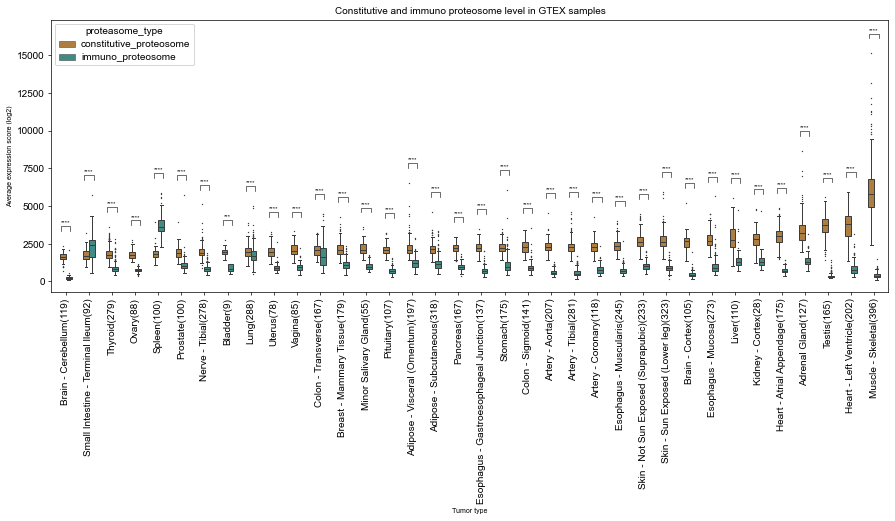

In [73]:
const_immuno_df_concat['proteasome_score'] = const_immuno_df_concat['proteasome_score'].astype(float)
const_immuno_df_concat=const_immuno_df_concat[const_immuno_df_concat['proteasome_score']>0.0]
const_immuno_df_concat=const_immuno_df_concat[~const_immuno_df_concat['Tissue'].isin(['Fallopian Tube(5)', 'Cervix - Ectocervix(6)', 'Cervix - Endocervix(4)'])]
tissue_type=list(const_immuno_df_concat['Tissue'].unique())
box_pairs=[]
for i in range(len(tissue_type)):
    box_pairs.append(((tissue_type[i],'constitutive_proteosome'),(tissue_type[i],'immuno_proteosome')))

#plt.figure(figsize=(9.5,3.5))
plt.figure(figsize=(15,5))
res=sns.boxplot(x='Tissue',y='proteasome_score',hue='proteasome_type',data=const_immuno_df_concat,order=my_order,width=.5,linewidth=1,fliersize=.5,palette=cp_ip)
add_stat_annotation(res, data=const_immuno_df_concat, x="Tissue", y="proteasome_score",hue="proteasome_type",order=my_order,box_pairs=box_pairs,test='Mann-Whitney',comparisons_correction=None, text_format='star', loc='inside', verbose=2,linewidth=0.7,fontsize = 6)
plt.xticks(rotation=90)
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 10)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 10)
plt.setp(res.get_legend().get_texts(), fontsize='10')
plt.setp(res.get_legend().get_title(), fontsize='10')
plt.xlabel("Tumor type",fontsize=7)
plt.ylabel("Average expression score (log2)",fontsize=7)
plt.title('Constitutive and immuno proteosome level in GTEX samples',fontsize=10)
#plt.savefig("/workspace/projects/immunoproteasome/plots/"+'GTEX_constitutive_immuno_v1'+'.svg',bbox_inches = "tight")
plt.show()

### 3. CP IP correlation plot in GTEx

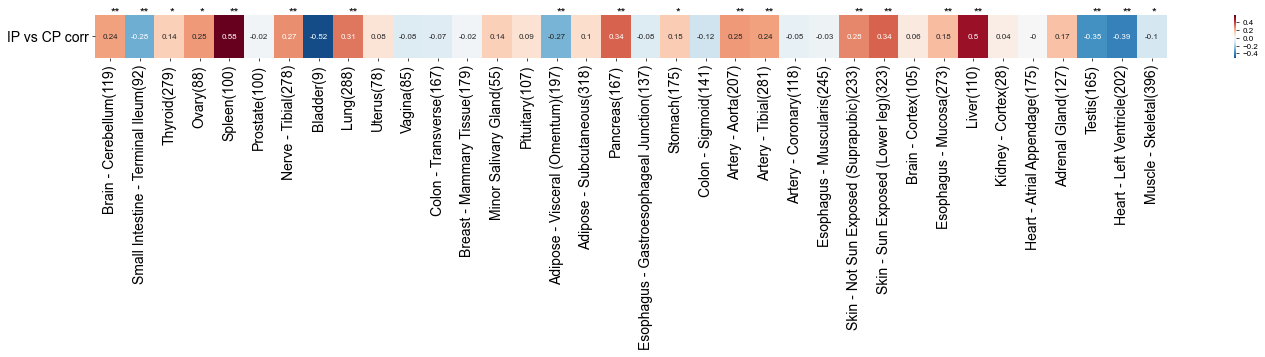

In [74]:
tissue_type=list(const_immuno_df_concat['Tissue'].unique())
corr_value_list=[]
p_value_list=[]
for i in range(len(tissue_type)):
    a=const_immuno_df_concat[(const_immuno_df_concat['Tissue']==tissue_type[i])&(const_immuno_df_concat['proteasome_type']=='constitutive_proteosome')]['proteasome_score']
    b=const_immuno_df_concat[(const_immuno_df_concat['Tissue']==tissue_type[i])&(const_immuno_df_concat['proteasome_type']=='immuno_proteosome')]['proteasome_score']
    correlation, p_value = stats.spearmanr(a,b)
    corr_value_list.append(correlation)
    p_value_list.append(p_value)

corr_value_list
df=pd.DataFrame()
df['IP vs CP corr']=np.round(corr_value_list,2)
df['p_value']=p_value_list
df.index=tissue_type
df=df.loc[my_order]

#df['significance']=np.nan
conditions=[(df['p_value'] < 0.01),(df['p_value'] > 0.01) & (df['p_value'] < 0.05),(df['p_value'] > 0.05)]
values=['**','*','']
df['significance'] = np.select(conditions, values)
df.to_csv('/workspace/projects/immunoproteasome/'+'GTEx_cp_ip_corr'+'.csv') ### saving the GTEx cp-ip correlation value

fig=plt.figure(figsize=(24,0.8))
res=sns.heatmap(df[['IP vs CP corr']].T,annot=True,xticklabels=True, yticklabels=True,cmap="RdBu_r",center=0,annot_kws={"fontsize":8})
#res=sns.heatmap(df[['p_value']].T)
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 14)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14,rotation = 0)
for i in range(36):
    res.annotate(df['significance'][i],xy=(i+0.5,0),fontsize = 12)
    
#plt.savefig("/workspace/projects/immunoproteasome/plots/"+'GTEX_normal_correlation_constitutive_immuno'+'.svg',bbox_inches = "tight",dpi=500)
plt.show()

In [75]:
df_corr_IP_CP_GTEX=df

In [57]:
df_corr_log_IP_CP_GTEX=df

In [76]:
df_corr_IP_CP_GTEX

,IP vs CP corr,p_value,significance
Brain - Cerebellum(119),0.24,7.773892e-03,**
Small Intestine - Terminal Ileum(92),-0.28,7.500437e-03,**
Thyroid(279),0.14,2.080495e-02,*
Ovary(88),0.25,2.020381e-02,*
Spleen(100),0.58,2.236712e-10,**
Prostate(100),-0.02,8.770925e-01,
Nerve - Tibial(278),0.27,6.633566e-06,**
Bladder(9),-0.52,1.543901e-01,
Lung(288),0.31,9.312331e-08,**
Uterus(78),0.08,5.042322e-01,


In [58]:
df_corr_log_IP_CP_GTEX

,IP vs CP corr,p_value,significance
Brain - Cerebellum(119),0.14,1.231033e-01,
Small Intestine - Terminal Ileum(92),-0.30,3.170570e-03,**
Ovary(88),0.21,4.989497e-02,*
Thyroid(279),0.13,3.709012e-02,*
Spleen(100),0.58,4.555735e-10,**
Prostate(100),-0.06,5.449455e-01,
Nerve - Tibial(278),0.25,1.961786e-05,**
Bladder(9),-0.47,2.053864e-01,
Lung(288),0.32,4.627615e-08,**
Uterus(78),0.10,3.795346e-01,


In [77]:
new_corr_df_GTEX=pd.merge(df_corr_log_IP_CP_GTEX,df_corr_IP_CP_GTEX,left_index=True, right_index=True)

In [80]:
new_corr_df_GTEX=new_corr_df_GTEX.rename(columns={'IP vs CP corr_x':'IP vs CP corr_log_RSEM+1','IP vs CP corr_y':'IP vs CP corr_RSEM'})

In [81]:
new_corr_df_GTEX

,IP vs CP corr_log_RSEM+1,p_value_x,significance_x,IP vs CP corr_RSEM,p_value_y,significance_y
Brain - Cerebellum(119),0.14,1.231033e-01,,0.24,7.773892e-03,**
Small Intestine - Terminal Ileum(92),-0.30,3.170570e-03,**,-0.28,7.500437e-03,**
Ovary(88),0.21,4.989497e-02,*,0.25,2.020381e-02,*
Thyroid(279),0.13,3.709012e-02,*,0.14,2.080495e-02,*
Spleen(100),0.58,4.555735e-10,**,0.58,2.236712e-10,**
Prostate(100),-0.06,5.449455e-01,,-0.02,8.770925e-01,
Nerve - Tibial(278),0.25,1.961786e-05,**,0.27,6.633566e-06,**
Bladder(9),-0.47,2.053864e-01,,-0.52,1.543901e-01,
Lung(288),0.32,4.627615e-08,**,0.31,9.312331e-08,**
Uterus(78),0.10,3.795346e-01,,0.08,5.042322e-01,


In [82]:
new_corr_df_GTEX.to_csv('/workspace/projects/immunoproteasome/supplementary_tables/corr_GTEX.csv')

### 3. GTEx normal and  TCGA_tumor sample analysis

In [14]:
with open('/workspace/projects/immunoproteasome/data/gtex_normal/gtex_RSEM_Hugo_norm_count','r') as f:
    listl=[]
    gene_list=[]
    diff_list=[]
    i=0
    for line in f:
        strip_lines=line.strip()
        listli=strip_lines.split()
        m=listl.append(listli)
        gene_list.append(listl[i][0])
        if gene_list[i] in ['PSMB5','PSMB6','PSMB7','PSMB8','PSMB9','PSMB10','PTPRC']:
            diff_list.append(listl[i])
        i=i+1

df = pd.DataFrame.from_records(diff_list)
df.columns=listl[0]
df=df.set_index('sample')

In [15]:
df=df.T
df['constitutive_proteosome']=(1/3)*(pd.to_numeric(df['PSMB5'])+pd.to_numeric(df['PSMB6'])+pd.to_numeric(df['PSMB7']))
df['immuno_proteosome']=(1/3)*(pd.to_numeric(df['PSMB8'])+pd.to_numeric(df['PSMB9'])+pd.to_numeric(df['PSMB10']))    

In [16]:
GTEX_tissue_data_id=pd.read_csv("/workspace/projects/immunoproteasome/data/gtex_normal/GTExPortal.csv")
my_dict_GTEx = {
  "Bladder":"BLCA",
  "Breast - Mammary Tissue":"BRCA",
  "Cervix - Ectocervix":"CESC",
  "Cervix - Endocervix":"CESC",
  "Uterus":"UCEC",
  "Colon - Sigmoid":"READ",
  "Colon - Transverse":"COAD",
  "Liver":"LIHC",
  "Minor Salivary Gland":"HNSC",
  "Esophagus - Mucosa":"ESCA",
  "Esophagus - Muscularis":"ESCA",
  "Esophagus - Gastroesophageal Junction":"ESCA",
  "Prostate":"PRAD",
  "Stomach":"STAD",
  "Thyroid":"THCA",
  "Lung":"LUAD",
  "Kidney - Cortex":"KIRC",
  "Skin - Sun Exposed (Lower leg)":"SKCM",
  "Skin - Not Sun Exposed (Suprapubic)":"SKCM",
  "Adipose - Subcutaneous":"SARC",
  "Nerve - Tibial":"SARC",
  "Muscle - Skeletal":"SARC",
  "Adipose - Visceral (Omentum)":"SARC",
  "Pancreas":"PAAD",
  "Ovary":"OV",
  "Uterus":"UCEC",
  "Brain - Cortex":"GBM",
  "Brain - Cerebellum":"GBM",
  "Adrenal Gland":"ACC",
  "Testis":"TGCT",
  "Kidney - Medulla":"KIRC"
}
GTEx_tumor_list=['Bladder','Breast - Mammary Tissue','Cervix - Ectocervix','Cervix - Endocervix','Uterus','Colon - Sigmoid','Colon - Transverse','Liver','Minor Salivary Gland','Esophagus - Mucosa','Esophagus - Muscularis','Esophagus - Gastroesophageal Junction','Prostate','Stomach','Thyroid','Lung','Kidney - Cortex',"Skin - Sun Exposed (Lower leg)","Skin - Not Sun Exposed (Suprapubic)","Adipose - Subcutaneous","Nerve - Tibial","Muscle - Skeletal","Adipose - Visceral (Omentum)","Pancreas","Ovary","Uterus","Brain - Cortex","Brain - Cerebellum","Adrenal Gland","Testis","Kidney - Medulla"]

dff=GTEX_tissue_data_id[GTEX_tissue_data_id['Tissue'].isin(GTEx_tumor_list)]
dff1=df.replace({"Tissue":my_dict_GTEx })


In [17]:
df1=df.T
df1.columns=df1.columns.str.split('-').str[0:3].str.join('-')
df1=df1.T

#GTEx_tumor_list=['Bladder','Breast - Mammary Tissue','Cervix - Ectocervix','Cervix - Endocervix','Uterus','Colon - Sigmoid','Colon - Transverse','Liver','Minor Salivary Gland','Esophagus - Mucosa','Esophagus - Muscularis','Esophagus - Gastroesophageal Junction','Prostate','Stomach','Thyroid','Lung','Kidney - Cortex']
GTEx_tumor_list=['Bladder','Breast - Mammary Tissue','Cervix - Ectocervix','Cervix - Endocervix','Uterus','Colon - Sigmoid','Colon - Transverse','Liver','Minor Salivary Gland','Esophagus - Mucosa','Esophagus - Muscularis','Esophagus - Gastroesophageal Junction','Prostate','Stomach','Thyroid','Lung','Kidney - Cortex',"Skin - Sun Exposed (Lower leg)","Skin - Not Sun Exposed (Suprapubic)","Adipose - Subcutaneous","Nerve - Tibial","Muscle - Skeletal","Adipose - Visceral (Omentum)","Pancreas","Ovary","Uterus","Brain - Cortex","Brain - Cerebellum","Adrenal Gland","Testis","Kidney - Medulla"]
GTEX_tissue_data_id=GTEX_tissue_data_id[GTEX_tissue_data_id['Tissue'].isin(GTEx_tumor_list)]
GTEX_tissue_data_id=GTEX_tissue_data_id.replace({"Tissue":my_dict_GTEx })

GTEX_tissue_data_id1=GTEX_tissue_data_id[['Tissue Sample ID','Tissue']]
GTEX_tissue_data_id1=GTEX_tissue_data_id1.set_index('Tissue Sample ID')
gtex_sample_tissue_type_merge=pd.merge(df1, GTEX_tissue_data_id1, left_index=True, right_index=True)

gtex_sample_tissue_type_merge['Tissue'] = pd.Categorical(gtex_sample_tissue_type_merge['Tissue'],categories=list(gtex_sample_tissue_type_merge['Tissue'].unique()),ordered=True)
gtex_sample_tissue_type_merge = gtex_sample_tissue_type_merge.sort_values('Tissue',ascending=False)

tissue_type=list(gtex_sample_tissue_type_merge['Tissue'].unique())
frames1={}
corr_list=[]
gene_list=['PSMB5','PSMB6','PSMB7','PSMB8','PSMB9','PSMB10']
for i in range(len(tissue_type)):
    dff=gtex_sample_tissue_type_merge[gtex_sample_tissue_type_merge['Tissue']==tissue_type[i]]
   
    df_tmp=dff[['PSMB5','PSMB6','PSMB7','PSMB8','PSMB9','PSMB10','PTPRC','immuno_proteosome','constitutive_proteosome']]
    df_tmp=df_tmp.apply(pd.to_numeric)
    
    corr_list_tmp=[]
    for j in range(len(gene_list)):
        a=df_tmp[gene_list[j]]
        b=df_tmp['PTPRC']
        correlation, p_value = stats.spearmanr(a,b)
        corr_list_tmp.append(correlation)
        df1=dff[['constitutive_proteosome','Tissue']]
        df2=dff[['immuno_proteosome','Tissue']]
        df1['proteasome_type']='constitutive_proteosome'
        df2['proteasome_type']='immuno_proteosome'
        df1=df1.rename(columns={"constitutive_proteosome":"proteasome_score"})
        df2=df2.rename(columns={"immuno_proteosome":"proteasome_score"})
        df3=pd.concat([df1,df2])
        frames1[i]=df3
    corr_list.append(corr_list_tmp)
dff4=pd.concat(frames1)

###----------- dataframe for supplementary file ----------------------------------
gtex_sample_id_tt=gtex_sample_tissue_type_merge[['Tissue']]
gtex_sample_id_tt = gtex_sample_id_tt[~gtex_sample_id_tt.index.duplicated(keep='first')]

/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [18]:
### Computing TCGA tumor median score of constituive and immunoproteasome
tcga_tumor_const_proteasome=[]
tcga_tumor_immuno_proteasome=[]
tcga_tissue_type=list(const_immuno_df_tcga['Tumor type'].unique())
tcga_tumor_median_proteasome_score=pd.DataFrame()
for i in range(len(tcga_tissue_type)):
    tcga_tumor_const_proteasome.append(np.median(const_immuno_df_tcga[(const_immuno_df_tcga['Tumor type']==tcga_tissue_type[i])&(const_immuno_df_tcga['Proteosome type']=='constitutive proteosome')]['Average expression score']))
    tcga_tumor_immuno_proteasome.append(np.median(const_immuno_df_tcga[(const_immuno_df_tcga['Tumor type']==tcga_tissue_type[i])&(const_immuno_df_tcga['Proteosome type']=='Immuno proteosome')]['Average expression score']))

tcga_tumor_median_proteasome_score['tcga_tumor_const_proteasome']=tcga_tumor_const_proteasome
tcga_tumor_median_proteasome_score['tcga_tumor_immuno_proteasome']=tcga_tumor_immuno_proteasome
tcga_tumor_median_proteasome_score['Tissue type']=tcga_tissue_type
tcga_tumor_median_proteasome_score['Tissue type']=tcga_tumor_median_proteasome_score['Tissue type'].str.split('(').str[0:1].str.join('.')

tcga_tumor_median_proteasome_score['tcga_median_proteasome_difference']=tcga_tumor_median_proteasome_score['tcga_tumor_const_proteasome']-tcga_tumor_median_proteasome_score['tcga_tumor_immuno_proteasome']

## Compute  TCGA and GTEx median proteasome score
gtex_const_proteasome=[]
gtex_immuno_proteasome=[]
gtex_tissue_type=list(dff4['Tissue'].unique())
gtex_median_proteasome_score=pd.DataFrame()
for i in range(len(gtex_tissue_type)):
    gtex_const_proteasome.append(np.median(dff4[(dff4['Tissue']==gtex_tissue_type[i])&(dff4['proteasome_type']=='constitutive_proteosome')]['proteasome_score']))
    gtex_immuno_proteasome.append(np.median(dff4[(dff4['Tissue']==gtex_tissue_type[i])&(dff4['proteasome_type']=='immuno_proteosome')]['proteasome_score']))

gtex_median_proteasome_score['gtex_const_proteasome']=gtex_const_proteasome
gtex_median_proteasome_score['gtex_immuno_proteasome']=gtex_immuno_proteasome
gtex_median_proteasome_score['Tissue type']=gtex_tissue_type

gtex_median_proteasome_score['gtex_median_proteasome_difference']=gtex_median_proteasome_score['gtex_const_proteasome']-gtex_median_proteasome_score['gtex_immuno_proteasome']
gtex_tcga_median_proteasome_diff=pd.merge(tcga_tumor_median_proteasome_score,gtex_median_proteasome_score,on='Tissue type')
gtex_tcga_median_proteasome_diff1=gtex_tcga_median_proteasome_diff[['Tissue type','tcga_median_proteasome_difference','gtex_median_proteasome_difference']]


### 1. TCGA and GTEx median immunoproteasome score scatter plot

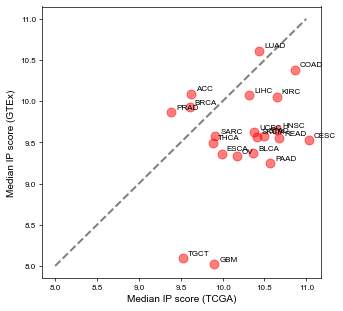

In [19]:
x = list(gtex_tcga_median_proteasome_diff['tcga_tumor_immuno_proteasome'])  # x_list
y = list(gtex_tcga_median_proteasome_diff['gtex_immuno_proteasome']) #y_list
labels = list(gtex_tcga_median_proteasome_diff1['Tissue type']) #tumor_list

fig, ax = plt.subplots(figsize=(5, 5))
# Plot the scatter points
ax.scatter(x, y,
           color="red",  # Color of the dots
           s=80,         # Size of the dots
           alpha=0.5,     # Alpha of the dots
           linewidths=1)  # Size of edge around the dots
ax.set_xlabel('Median IP score (TCGA)',size=10)
ax.set_ylabel('Median IP score (GTEx)',size=10)

plt.plot([8, 11], [8, 11], color = 'black', linewidth = 2.0,alpha=0.5,linestyle="dashed")

# Add the participant names as text labels for each point
for x_pos, y_pos, label in zip(x, y, labels):
    ax.annotate(label,             # The label for this point
                xy=(x_pos, y_pos), # Position of the corresponding point
                xytext=(5, 5),     # Offset text by 7 points to the right
                textcoords='offset points', # tell it to use offset points
                ha='left',         # Horizontally aligned to the left
                va='center')       # Vertical alignment is centered
plt.savefig("/workspace/projects/immunoproteasome/plots/"+'median_immuno_score_TCGA_tumor_gtex_normal_v1'+'.svg',bbox_inches = "tight",dpi=500)
plt.show()

### 2. TCGA and GTEx median constitutiveproteasome score scatter plot

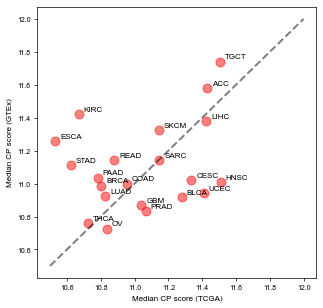

In [20]:
x = list(gtex_tcga_median_proteasome_diff['tcga_tumor_const_proteasome'])  # x_list
y = list(gtex_tcga_median_proteasome_diff['gtex_const_proteasome']) #y_list
labels = list(gtex_tcga_median_proteasome_diff1['Tissue type']) #tumor_list

fig, ax = plt.subplots(figsize=(5, 5))
# Plot the scatter points
ax.scatter(x, y,
           color="red",  # Color of the dots
           s=80,         # Size of the dots
           alpha=0.5,     # Alpha of the dots
           linewidths=1)  # Size of edge around the dots
ax.set_xlabel('Median CP score (TCGA)',size=8)
ax.set_ylabel('Median CP score (GTEx)',size=8)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.plot([10.5, 12], [10.5, 12], color = 'black', linewidth = 2.0,alpha=0.5,linestyle="dashed")


# Add the participant names as text labels for each point
for x_pos, y_pos, label in zip(x, y, labels):
    ax.annotate(label,             # The label for this point
                xy=(x_pos, y_pos), # Position of the corresponding point
                xytext=(5, 5),     # Offset text by 7 points to the right
                textcoords='offset points', # tell it to use offset points
                ha='left',         # Horizontally aligned to the left
                va='center')       # Vertical alignment is centered
plt.savefig("/workspace/projects/immunoproteasome/plots/"+'median_constitutive_score_TCGA_tumor_gtex_normal_v1'+'.svg',bbox_inches = "tight",dpi=500)
plt.show()

### 3. Difference of the constitutive and immunoproteasasome score in GTEx and normal

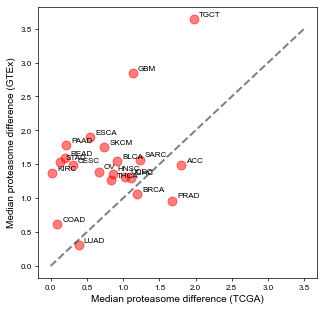

In [21]:
x = list(gtex_tcga_median_proteasome_diff1['tcga_median_proteasome_difference'])  # x_list
y = list(gtex_tcga_median_proteasome_diff1['gtex_median_proteasome_difference']) #y_list
labels = list(gtex_tcga_median_proteasome_diff1['Tissue type']) #tumor_list

fig, ax = plt.subplots(figsize=(5, 5))
# Plot the scatter points
ax.scatter(x, y,
           color="red",  # Color of the dots
           s=80,         # Size of the dots
           alpha=0.5,     # Alpha of the dots
           linewidths=1)  # Size of edge around the dots
ax.set_xlabel('Median proteasome difference (TCGA)',size=10)
ax.set_ylabel('Median proteasome difference (GTEx)',size=10)


plt.plot([0, 3.5], [0, 3.5], color = 'black', linewidth = 2.0,alpha=0.5,linestyle="dashed")
#ax.xlim(0,2)
#ax.ylim(0,2)

# Add the participant names as text labels for each point
for x_pos, y_pos, label in zip(x, y, labels):
    ax.annotate(label,             # The label for this point
                xy=(x_pos, y_pos), # Position of the corresponding point
                xytext=(5, 5),     # Offset text by 7 points to the right
                textcoords='offset points', # tell it to use offset points
                ha='left',         # Horizontally aligned to the left
                va='center')       # Vertical alignment is centered

import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig("/workspace/projects/immunoproteasome/plots/"+'median_difference_constitutive_immuno_TCGA_tumor_gtex_normal_v1'+'.svg',bbox_inches = "tight",dpi=500)
plt.show()

### 1. Subsetting data into low and high immunoproteasome group

In [22]:
import glob, os
os.chdir("/workspace/projects/immunoproteasome/data/tcga_tumor/")
tumor_list=[]
for  i in glob.glob("*.tsv"):
    tumor_list.append(i)
os.chdir("/workspace/projects/immunoproteasome/")

In [23]:
input_path1 = "/workspace/projects/immunoproteasome/data/tcga_tumor/"
low_immuno_df=[]
high_immuno_df=[]
for i in range(33):
    gene_data_frame=pd.read_csv(input_path1+tumor_list[i],sep='\t',index_col='Hybridization REF')
    
    gene_data_frame.columns=gene_data_frame.columns.str.split('-').str[0:3].str.join('.')
    gene_data_frame.to_csv('/workspace/projects/immunoproteasome/R_code/v1_copy_2/gene_exp/'+'gene_exp_'+tumor_list[i].split('.')[0]+'.csv') ## save gene expression dataframe
    
    gene_data_frame=gene_data_frame.T
    gene_data_frame=np.log2(gene_data_frame+1)
    gene_data_frame['const_proteosome']=(1/3)*(gene_data_frame['PSMB5']+gene_data_frame['PSMB6']+gene_data_frame['PSMB7'])
    gene_data_frame['immuno_proteosome']=(1/3)*(gene_data_frame['PSMB8']+gene_data_frame['PSMB9']+gene_data_frame['PSMB10'])
    
    low_immuno=gene_data_frame[gene_data_frame['immuno_proteosome']<np.percentile(gene_data_frame['immuno_proteosome'],[25, 50, 75])[0]]
    high_immuno=gene_data_frame[gene_data_frame['immuno_proteosome']>np.percentile(gene_data_frame['immuno_proteosome'],[25, 50, 75])[2]]
    
    low_immuno=low_immuno[['immuno_proteosome']]
    low_immuno['immuno_proteosome_status']='low'
    low_immuno['tumor_type']=tumor_list[i].split('.')[0]   ### Change constitutive and immunoproteasome to generate high and low IP and CP samples
    
    high_immuno=high_immuno[['immuno_proteosome']]
    high_immuno['immuno_proteosome_status']='high'
    high_immuno['tumor_type']=tumor_list[i].split('.')[0]
    

    low_immuno_df.append(low_immuno)
    high_immuno_df.append(high_immuno)
    
df1=pd.concat(low_immuno_df)
df2=pd.concat(high_immuno_df)
final_df_IP=pd.concat([df1,df2])
#final_df_IP.to_csv('/workspace/projects/immunoproteasome/R_code/v1_copy_2/01_data/'+'final_df_high_low_immuno_proteosome_uncorrected'+'.csv') ## saving sample_id information in low and high immunoproteasome group
final_df_IP.to_csv('/workspace/projects/immunoproteasome/data/IP_CP_cohort/'+'final_df_high_low_immuno_proteosome_uncorrected'+'.csv') ## saving sample_id information in low and high immunoproteasome group

### 2. Subsetting data into low and high constproteasome group

In [24]:
input_path1 = "/workspace/projects/immunoproteasome/data/tcga_tumor/"
low_immuno_df=[]
high_immuno_df=[]
for i in range(33):
    gene_data_frame=pd.read_csv(input_path1+tumor_list[i],sep='\t',index_col='Hybridization REF')
    
    gene_data_frame.columns=gene_data_frame.columns.str.split('-').str[0:3].str.join('.')
    gene_data_frame.to_csv('/workspace/projects/immunoproteasome/R_code/v1_copy_2/gene_exp/'+'gene_exp_'+tumor_list[i].split('.')[0]+'.csv') ## save gene expression dataframe
    
    gene_data_frame=gene_data_frame.T
    gene_data_frame=np.log2(gene_data_frame+1)
    gene_data_frame['const_proteosome']=(1/3)*(gene_data_frame['PSMB5']+gene_data_frame['PSMB6']+gene_data_frame['PSMB7'])
    gene_data_frame['immuno_proteosome']=(1/3)*(gene_data_frame['PSMB8']+gene_data_frame['PSMB9']+gene_data_frame['PSMB10'])
    
    low_immuno=gene_data_frame[gene_data_frame['const_proteosome']<np.percentile(gene_data_frame['const_proteosome'],[25, 50, 75])[0]]
    high_immuno=gene_data_frame[gene_data_frame['const_proteosome']>np.percentile(gene_data_frame['const_proteosome'],[25, 50, 75])[2]]
    
    low_immuno=low_immuno[['const_proteosome']]
    low_immuno['const_proteosome_status']='low'
    low_immuno['tumor_type']=tumor_list[i].split('.')[0]   ### Change constitutive and immunoproteasome to generate high and low IP and CP samples
    
    high_immuno=high_immuno[['const_proteosome']]
    high_immuno['const_proteosome_status']='high'
    high_immuno['tumor_type']=tumor_list[i].split('.')[0]
    

    low_immuno_df.append(low_immuno)
    high_immuno_df.append(high_immuno)
    
df1=pd.concat(low_immuno_df)
df2=pd.concat(high_immuno_df)
final_df_CP=pd.concat([df1,df2])
#final_df_CP.to_csv('/workspace/projects/immunoproteasome/R_code/v1_copy_2/01_data/'+'final_df_high_low_const_proteosome_uncorrected'+'.csv') ## saving sample_id information in low and high immunoproteasome group
final_df_CP.to_csv('/workspace/projects/immunoproteasome/data/IP_CP_cohort/'+'final_df_high_low_const_proteosome_uncorrected'+'.csv') ## saving sample_id information in low and high immunoproteasome group

In [25]:
final_df_CP1=final_df_CP[['const_proteosome_status','tumor_type']]
final_df_IP1=final_df_IP[['immuno_proteosome_status','tumor_type']]

### Makeing first supplementarty file 

In [26]:
with pd.ExcelWriter('/workspace/projects/immunoproteasome/supplementary_tables/supple1.xlsx') as writer:  
    CP_IP_TCGA1.to_excel(writer, sheet_name='Sheet_name_1')
    CP_IP_GTEX2.to_excel(writer, sheet_name='Sheet_name_2')
    gtex_sample_id_tt.to_excel(writer, sheet_name='Sheet_name_3')
    final_df_IP1.to_excel(writer, sheet_name='Sheet_name_4')
    final_df_CP1.to_excel(writer, sheet_name='Sheet_name_5')

In [38]:
final_df_CP

Hybridization REF,const_proteosome,const_proteosome_status,tumor_type
TCGA.OR.A5J2,10.505287,low,ACC
TCGA.OR.A5JK,11.070872,low,ACC
TCGA.OR.A5JR,10.818431,low,ACC
TCGA.OR.A5JT,10.976697,low,ACC
TCGA.OR.A5JV,10.712758,low,ACC
...,...,...,...
TCGA.EI.6917,11.155279,high,READ
TCGA.F5.6813,11.245885,high,READ
TCGA.F5.6814,11.635844,high,READ
TCGA.F5.6861,11.356602,high,READ


In [39]:
df1=pd.read_csv("/workspace/projects/immunoproteasome/v1_copy_4/01_data/final_df_high_low_const_proteosome_uncorrected.csv")

In [40]:
df1

,Unnamed: 0,const_proteosome,const_proteosome_status,tumor_type
0,TCGA.OR.A5J2,10.505287,low,ACC
1,TCGA.OR.A5JK,11.070872,low,ACC
2,TCGA.OR.A5JR,10.818431,low,ACC
3,TCGA.OR.A5JT,10.976697,low,ACC
4,TCGA.OR.A5JV,10.712758,low,ACC
...,...,...,...,...
4747,TCGA.EI.6917,11.155279,high,READ
4748,TCGA.F5.6813,11.245885,high,READ
4749,TCGA.F5.6814,11.635844,high,READ
4750,TCGA.F5.6861,11.356602,high,READ


## Makeing supplementary figures

In [83]:
list_of_tumor_filename=[]
for i in range(33):
    list_of_tumor_filename.append(list(my_order1)[i].split('(')[0])

In [84]:
tumor_purity_df=pd.read_csv("/workspace/projects/immunoproteasome/data/purity_data/TCGA_mastercalls.abs_tables_JSedit.fixed.txt",sep='\t')
tumor_purity_df['sample_id']=tumor_purity_df['array'].str.split('-').str[0:3].str.join('.')
tumor_purity_df=tumor_purity_df[['purity','sample_id']]
tumor_purity_df=tumor_purity_df.set_index('sample_id')

In [87]:
tumor_purity_df=pd.read_csv("/workspace/projects/immunoproteasome/data/purity_data/TCGA_mastercalls.abs_tables_JSedit.fixed.txt",sep='\t')

In [88]:
tumor_purity_df

,array,sample,call status,purity,ploidy,Genome doublings,Coverage for 80% power,Cancer DNA fraction,Subclonal genome fraction,solution
0,TCGA-OR-A5J1-01,TCGA-OR-A5J1-01A-11D-A29H-01,called,0.90,2.00,0.0,9.0,0.90,0.02,new
1,TCGA-OR-A5J2-01,TCGA-OR-A5J2-01A-11D-A29H-01,called,0.89,1.30,0.0,6.0,0.84,0.16,new
2,TCGA-OR-A5J3-01,TCGA-OR-A5J3-01A-11D-A29H-01,called,0.93,1.27,0.0,5.0,0.89,0.11,new
3,TCGA-OR-A5J4-01,TCGA-OR-A5J4-01A-11D-A29H-01,called,0.87,2.60,1.0,12.0,0.89,0.08,new
4,TCGA-OR-A5J5-01,TCGA-OR-A5J5-01A-11D-A29H-01,called,0.93,2.79,1.0,12.0,0.95,0.15,new
...,...,...,...,...,...,...,...,...,...,...
10781,TCGA-P6-A5OG-01,ACC-TCGA-P6-A5OG-Tumor,maf_call,0.38,1.48,0.0,19.0,0.32,NaN,old
10782,TCGA-R8-A73M-01,LGG-TCGA-R8-A73M-Tumor-SM-4WPJ2,maf_call,1.00,3.87,1.0,16.0,1.00,NaN,old
10783,TCGA-RD-A7BW-01,STAD-TCGA-RD-A7BW-Tumor-SM-4WPA1,maf_call,0.18,1.88,0.0,60.0,0.17,NaN,old
10784,TCGA-T1-A6J8-01,LIHC-TCGA-T1-A6J8-Tumor,maf_call,0.80,1.82,0.0,9.0,0.78,NaN,old


In [29]:
config_rcparams()
input_path1="/workspace/projects/immunoproteasome/data/tcga_tumor/"
median_avg_log_proteosome_genes=[]
median_const_score=[]
newdf=pd.DataFrame(columns=['constitutive_proteosome','immuno_proteosome','tumor_type'])
list_of_tumor_filename1=[]
frames={}

tumor_list=[]
corr_p_value_tumor_type_df=pd.DataFrame()
corr_list=[]
p_value_list=[]
frames1={}

for i in range(len(list_of_tumor_filename)):
    gene_data_frame=pd.read_csv(input_path1+list_of_tumor_filename[i]+'.tsv',index_col='Hybridization REF',sep='\t')
    gene_data_frame.columns=gene_data_frame.columns.str.split('-').str[0:3].str.join('.')
    gene_data_frame=(gene_data_frame+1).T

    log_gene_data_frame=np.log2(gene_data_frame[['PSMB5','PSMB6','PSMB7','PSMB8','PSMB9','PSMB10']])
    
    log_gene_data_frame1=log_gene_data_frame
    log_gene_data_frame1['Tumor tissue']=list_of_tumor_filename[i].split('.')[0]
    frames1[i]=log_gene_data_frame1
    
    log_gene_data_frame['constitutive_proteosome']=(1/3)*(log_gene_data_frame['PSMB5']+log_gene_data_frame['PSMB6']+log_gene_data_frame['PSMB7'])
    log_gene_data_frame['immuno_proteosome']=(1/3)*(log_gene_data_frame['PSMB8']+log_gene_data_frame['PSMB9']+log_gene_data_frame['PSMB10'])
    
    merged_df=pd.merge(log_gene_data_frame,tumor_purity_df,left_index=True, right_index=True)
    log_gene_data_frame1=merged_df[merged_df['purity']>0.7]        
    
    ### computing correlation value ################################
    correlation, p_value = stats.spearmanr(log_gene_data_frame1['constitutive_proteosome'], log_gene_data_frame1['immuno_proteosome'])
    
    corr_list.append(correlation)  
    tumor_list.append(list_of_tumor_filename[i].split('.')[0])
    p_value_list.append(p_value)
    #####===============================================================
    
    extracted_df=log_gene_data_frame1[['constitutive_proteosome','immuno_proteosome']]
    
    frames[i]=log_gene_data_frame1[['constitutive_proteosome','immuno_proteosome']]
    frames[i]['Tumor type']=list_of_tumor_filename[i].split('.')[0]+"("+str(extracted_df.shape[0])+")"
    median_const_score.append(np.median(frames[i]['constitutive_proteosome']))
    
### correlation value dataframe
corr_p_value_tumor_type_df['tumor_type']=tumor_list
corr_p_value_tumor_type_df['IP vs CP corr']=corr_list    
corr_p_value_tumor_type_df['p_value']=p_value_list
corr_p_value_tumor_type_df['IP vs CP corr']=np.round(corr_p_value_tumor_type_df['IP vs CP corr'],2)
##=======================================================
    
concat_df=pd.concat(frames)
### for ordering the boxplot ==============================================
#median_const_df=pd.DataFrame()
#median_const_df['Tumor type']=list(concat_df['Tumor type'].unique())
#median_const_df['median_const_score']=median_const_score
my_order=list(concat_df['Tumor type'].unique())#median_const_df.sort_values(by=['median_const_score'])['Tumor type']
###==========================================================================

const_df=concat_df[['constitutive_proteosome','Tumor type']]
immuno_df=concat_df[['immuno_proteosome','Tumor type']]
const_df['Proteosome type']='constitutive proteosome'
const_df=const_df.rename(columns={'constitutive_proteosome':'Average expression score'})
immuno_df['Proteosome type']='Immuno proteosome'
immuno_df=immuno_df.rename(columns={'immuno_proteosome':'Average expression score'})
const_immuno_df_tcga=pd.concat([const_df,immuno_df])

#### Creating files for supplementary #####################################
#CP_IP_TCGA=pd.concat(frames1)
#CP_IP_TCGA1= CP_IP_TCGA.reset_index(level=[0])
#CP_IP_TCGA1=CP_IP_TCGA1.drop(['level_0'],axis=1)
#CP_IP_TCGA1=CP_IP_TCGA1.reindex(columns=['PSMB5','PSMB6','PSMB7','PSMB8','PSMB9','PSMB10','constitutive_proteosome','immuno_proteosome','Tumor tissue'])
####-----------------------------------------------------------------

/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

LUAD(48)_constitutive proteosome v.s. LUAD(48)_Immuno proteosome: Mann-Whitney-Wilcoxon test two-sided, P_val=2.279e-12 U_stat=2.110e+03
OV(212)_constitutive proteosome v.s. OV(212)_Immuno proteosome: Mann-Whitney-Wilcoxon test two-sided, P_val=1.904e-21 U_stat=3.447e+04
READ(35)_constitutive proteosome v.s. READ(35)_Immuno proteosome: Mann-Whitney-Wilcoxon test two-sided, P_val=5.706e-02 U_stat=7.750e+02
LGG(318)_constitutive proteosome v.s. LGG(318)_Immuno proteosome: Mann-Whitney-Wilcoxon test two-sided, P_val=3.312e-100 U_stat=9.980e+04
COAD(106)_constitutive proteosome v.s. COAD(106)_Immuno proteosome: Mann-Whitney-Wilcoxon test two-sided, P_val=1.201e-04 U_stat=7.336e+03
PCPG(93)_constitutive proteosome v.s. PCPG(93)_Immuno proteosome: Mann-Whitney-Wilcoxon test two-sided, P_val=2.801e-30 U_stat=8.523e+03
GBM(103)_cons

/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app


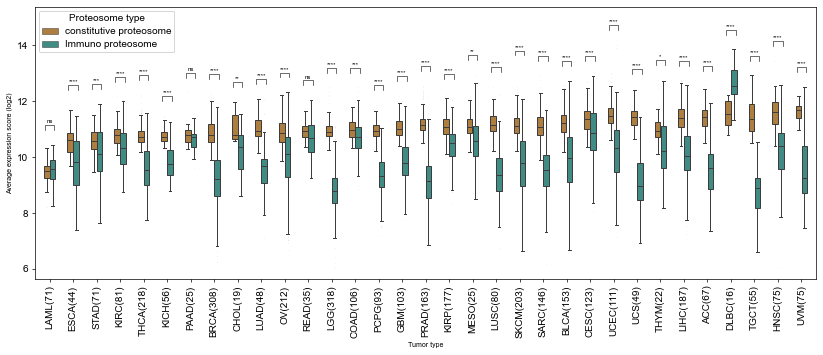

In [30]:
### plotting the constitutve and immunoproteasome in 33 tumor types 
aa=list(const_immuno_df_tcga['Tumor type'].unique())
bb=list(const_immuno_df_tcga['Proteosome type'].unique())
box_pairs=[]
for i in range(33):
    box_pairs.append(((aa[i],bb[0]),(aa[i],bb[1])))

#plt.figure(figsize=(9.5,3.5))
plt.figure(figsize=(14,5))
#res=sns.boxplot(x="Tumor type",y="Average expression score",hue="Proteosome type",data=const_immuno_df_tcga,order=my_order,width=.5,linewidth=1,palette={'constitutive proteosome': '#bf812d','Immuno proteosome':'#35978f'},fliersize=.5)
res=sns.boxplot(x="Tumor type",y="Average expression score",hue="Proteosome type",data=const_immuno_df_tcga,order=my_order,width=.5,linewidth=1,palette={'constitutive proteosome': '#bf812d','Immuno proteosome':'#35978f'},fliersize=.02)
add_stat_annotation(res, data=const_immuno_df_tcga, x="Tumor type", y="Average expression score",hue="Proteosome type",order=my_order,box_pairs=box_pairs,test='Mann-Whitney',comparisons_correction=None,text_format='star', loc='inside', verbose=2,linewidth=0.7,fontsize = 6)
plt.xticks(rotation=90)
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 10)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 10)
plt.setp(res.get_legend().get_texts(), fontsize='10')
plt.setp(res.get_legend().get_title(), fontsize='10')
plt.xlabel("Tumor type",fontsize=7)
plt.ylabel("Average expression score (log2)",fontsize=7)
plt.savefig("/workspace/projects/immunoproteasome/plots/"+'Constitutive_immuno_proteosome_level_purity_0.7'+'.svg',bbox_inches = "tight")
plt.show()

order_all_tumor_samples=[]
for i in range(len(my_order)):
    order_all_tumor_samples.append(list(my_order)[i].split('(')[0])

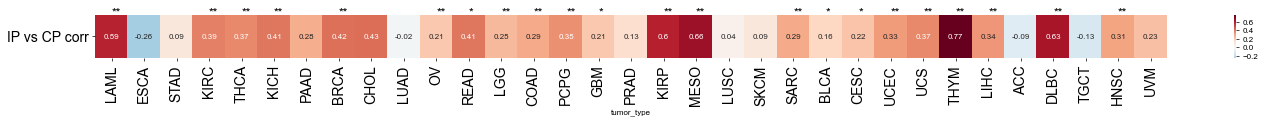

In [31]:
### Plotting correaltion heatmap  in pure samples ####################################
tumor_list=order_all_tumor_samples
corr_p_value_tumor_type_df.sort_values(by=['IP vs CP corr'],inplace=True)
corr_p_value_tumor_type_df.index=list(range(0,33))
conditions=[(corr_p_value_tumor_type_df['p_value'] < 0.01),(corr_p_value_tumor_type_df['p_value'] > 0.01) & (corr_p_value_tumor_type_df['p_value'] < 0.05),(corr_p_value_tumor_type_df['p_value'] > 0.05)]
values=['**','*','']
corr_p_value_tumor_type_df['significance'] = np.select(conditions, values)
corr_p_value_tumor_type_df.to_csv('/workspace/projects/immunoproteasome/'+'TCGA_cp_ip_corr'+'.csv')

#median_const_immuno_tumor_type_df
corr_p_value_tumor_type_df
corr_p_value_tumor_type_df=corr_p_value_tumor_type_df.set_index('tumor_type').reindex(tumor_list).reset_index()
df_tmp=corr_p_value_tumor_type_df
df_tmp.index=list(range(0,33))

df_tmp1=df_tmp[['tumor_type','IP vs CP corr','p_value','significance']].set_index('tumor_type')
df_tmp1=df_tmp1.reindex(tumor_list)
fig=plt.figure(figsize=(24,0.8))
df_tmp2=df_tmp1[['IP vs CP corr','significance']]
res=sns.heatmap(df_tmp2[['IP vs CP corr']].T,annot=True,xticklabels=True, yticklabels=True,cmap="RdBu_r",center=0)
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 14)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
for i in range(33):
    res.annotate(df_tmp2['significance'][i],xy=(i+0.5,0),fontsize = 12)
plt.savefig("/workspace/projects/immunoproteasome/plots/"+'Corr_value_constitutive_and_immuno_purity_0.7'+'.svg',bbox_inches = "tight",dpi=500)
plt.show()